In [4]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


# High-order numerical integration

In order to create a composite numerical integration function to improve upon the provided composite Gaussian numerical integration formula with 2 nodes on each of n subintervals of $[a, b]$, which has a $O(h^4)$ convergence I wrote a program to examine the big $O(x)$ convergence when diffrent number of nodes where applied for each subinterval.

The chosen function should implement a composite numerical integration
formula that is $O(h^8)$ or faster.

Examining the convergence of the compossite gaussian integration implimentatin with two nodes on each of the n subinterval yeilds the following results.

 True Integral = 2.3924089071413306e+01
 Gauss-2 approximation:
     n             R(f)            relerr    conv rate
  ---------------------------------------------------
       20  2.3945771528797508e+01  9.1e-04     ----
       40  2.3921573107028049e+01  1.1e-04   3.107345
       80  2.3924029037298578e+01  2.5e-06   5.389185
      160  2.3924085882472767e+01  1.3e-07   4.234633
      320  2.3924088879531197e+01  8.0e-09   4.054785
      640  2.3924089059532218e+01  5.0e-10   4.013481
     1280  2.3924089070672466e+01  3.1e-11   4.003361
     2560  2.3924089071367035e+01  1.9e-12   4.000997
     5120  2.3924089071410389e+01  1.2e-13   3.987647
    10240  2.3924089071413178e+01  5.3e-15   4.511313
  ---------------------------------------------------
mean convergence rate = 4.14474966667

In [ ]:
# %load composite_Gaussx.cpp
/* 
   Laruence Brown
   SMU Mathematics
   Math 3316
   1 December 2016 
*/

// Inclusions
#include <stdlib.h>
#include <stdio.h>
#include <iostream>
#include <math.h>
#include <vector>
#include "fcn.hpp"

using namespace std;

// This routine numerically approximates the integral
//    int_a^b fun(x) dx
// using the composite Gaussian quadrature rule with x points per 
// subinterval, over n subintervals.  We 
// require that fun have the calling syntax 
//    y = fun(x)
// where y is a double and x is a const double.
//
// Usage: F = composite_Gauss2(fun, a, b, n);
//
// inputs:   f       integrand (Fcn object)
//           a       lower limit of integration
//           b       upper limit of integration
//           n       number of subintervals
//           x       number of nodes per subinterval
//
// outputs:  F       value of numerical integral
// 

//modify weights and points for given x
void get_xw(int x, vector<double> &xi, vector<double> &w){

  double xi_n[9];
  double w_n[9];

  //weights and points
  double xi_1[1] = {0};
  double w_1[1] = {2};

  double xi_2[2] = {-0.57735026918963, 0.57735026918963};
  double w_2[2] = {1,1};

  double xi_3[3] = {-0.77459666924148, 0 ,0.77459666924148};
  double w_3[3] = {0.55555555555555, 0.88888888888889, 0.55555555555555};

  double xi_4[4] = {-0.86113631159405,-0.33998104358486,
      0.33998104358486,0.86113631159405};
  double w_4[4] = {0.34785484513745,0.65214515486254,
      0.65214515486255,0.34785484513745};

  double xi_5[5] = {-0.90617984593866,-0.53846931010568,
      0.00000000000000,0.53846931010568,0.90617984593866};
  double w_5[5] = {0.23692688505619,0.47862867049937,
      0.56888888888889,0.47862867049937,0.23692688505619};

  double xi_6[6] = {-0.93246951420315,-0.66120938646626,
      -0.23861918608320, 0.23861918608320, 0.66120938646626,
      0.93246951420315};
  double w_6[6] = {0.17132449237917, 0.36076157304814,
      0.46791393457269, 0.46791393457269, 0.36076157304814,
      0.17132449237917};

  if (x == 1){
    copy(begin(xi_1), end(xi_1), begin(xi_n));
    copy(begin(w_1), end(w_1), begin(w_n));
  }
  else if (x == 2){
    copy(begin(xi_2), end(xi_2), begin(xi_n));
    copy(begin(w_2), end(w_2), begin(w_n));
  }
  else if (x == 3){
    copy(begin(xi_3), end(xi_3), begin(xi_n));
    copy(begin(w_3), end(w_3), begin(w_n));
  }
  else if (x == 4){
    copy(begin(xi_4), end(xi_4), begin(xi_n));
    copy(begin(w_4), end(w_4), begin(w_n));
  }
  else if (x == 5){
    copy(begin(xi_5), end(xi_5), begin(xi_n));
    copy(begin(w_5), end(w_5), begin(w_n));
  }
  else if (x == 6){
    copy(begin(xi_6), end(xi_6), begin(xi_n));
    copy(begin(w_6), end(w_6), begin(w_n));
  }
  else {
    cout << "Illegal x value..." << endl;
  }

  //update passed vectors
  xi.insert(xi.begin() , xi_n , xi_n + x) ; 
  w.insert(w.begin() , w_n , w_n + x) ; 

}

double composite_int_gen(Fcn& f, const double a, 
			const double b, const int n, int x) {

  // check input arguments
  if (b < a) {
    cerr << "error: illegal interval, b < a\n";
    return 0.0;
  }
  if (n < 1) {
    cerr << "error: illegal number of subintervals, n < 1\n";
    return 0.0;
  }

  // set subinterval width
  double h = (b-a)/n;

  // set nodes/weights defining the quadrature method
  vector<double> xi;
  vector<double> w;
  get_xw(x, xi, w);

  // initialize result
  double F = 0.0;

  // loop over subintervals, accumulating result
  //double xmid, node1, node2, node3, node4;
  double xmid;

  double nodes[x];
  for (int i=0; i<n; i++) {
   
    // determine evaluation points within subinterval
    xmid  = a + (i+0.5)*h;

    for (int i=0; i<x; i++){
      nodes[i] = xmid + 0.5*h*xi[i];
    }

    // add Gauss-n approximation on this subinterval to result
    for (int i=0; i<x; i++){
      F += w[i]*f(nodes[i]);
    }

  } // end loop

  // return final result
  return (0.5*h*F);

} // end of function

In [ ]:
# %load "test_Gaussx.cpp"
/* 
   Laruence Brown
   SMU Mathematics
   Math 3316
   21 November 2016 
*/

// Inclusions
#include <stdlib.h>
#include <stdio.h>
#include <iostream>
#include <vector>
#include <math.h>
#include "fcn.hpp"
#include "matrix.h" /*write vector*/

using namespace std;

// function prototypes
double composite_int_gen(Fcn& f, const double a, 
			const double b, const int n, int x);

// Integrand
class fcn : public Fcn {
public:
  double c, d;
  double operator()(double x) {   // function evaluation
    return (exp(c*x) + sin(d*x));
  }
  double antiderivative(double x) { // function evaluation
    return (exp(c*x)/c - cos(d*x)/d);
  }
};

//get x of convergece
double magnitude_change(double arg1, double arg2){
 return (arg2 == 0) ? 0 : (int)(1 + log10(fabs(arg1)) ) - (int)(1 + log10(fabs(arg2)) );
}

//mean
double get_mean(vector<double> sample){
  double mean = 0;
  for (int i=0; i<sample.size(); i++){
    if (isinf(sample[i]))
      mean += (mean/(sample.size()-1));         //[todo] fix model
    else
      mean += sample[i];
  }
  return mean /= sample.size();
}

//standard devation
double get_sd(vector<double> sample){
  double mean = get_mean(sample);

  //sd = sqrt((E (x-mean)^2)/n-1)
  double variance = 0;
  for (int i=0; i<sample.size(); i++){
    if (isinf(sample[i]))                       //[todo] fix model
      sample[i] = (mean/(sample.size()-1));
    variance += pow((sample[i] - mean),2);
  }
  variance /= sample.size() - 1;
  return sqrt(variance);

}

// This routine tests the Gauss-5 method on a simple integral
int main(int argc, char* argv[]) {

  // limits of integration
  double a = -3.0;
  double b = 5.0;

  // integrand
  fcn f;
  f.c = 0.5;
  f.d = 25.0;

  //number of nodes per subintevals
  vector<double> xs;
  vector<double> mean_convergence;

  //set x for guass for all tests
  for (int x=1; x<7; x++){
    // true integral value
    double Itrue = f.antiderivative(b) - f.antiderivative(a);
    printf("\n True Integral = %22.16e\n", Itrue);


    // test the Gauss-4 rule
    printf("\n Gauss-%d approximation:\n", x);
    cout << "     n             R(f)            relerr    conv rate\n";
    cout << "  ---------------------------------------------------\n";
    vector<int> n = {10, 20, 40, 80, 160, 320};
    vector<double> errors(n.size());
    vector<double> hvals(n.size());
    vector<double> conv_rates;
    vector<double> error_x_imprv;

    // iterate over n values, computing approximations, error, convergence rate
    double Iapprox;
    for (int i=0; i<n.size(); i++) {

      printf("   %6i", n[i]);

      Iapprox = composite_int_gen(f, a, b, n[i], x);
      errors[i] = fabs(Itrue-Iapprox)/fabs(Itrue);
      hvals[i] = (b-a)/n[i];
      if (i == 0) 
        printf("  %22.16e  %7.1e     ----\n", Iapprox, errors[i]);
      else{
        conv_rates.push_back( (log(errors[i-1]) - log(errors[i])) / (log(hvals[i-1]) - log(hvals[i])) );
        error_x_imprv.push_back(magnitude_change( errors[i-1], errors[i]));
        printf("  %22.16e  %7.1e   %f\n", Iapprox, errors[i], conv_rates[i-1]);
      }
    }

    //display converges rate anylisis
    //mean convergence rate
    double mean = get_mean(conv_rates);
    //sd
    double sd = get_sd(conv_rates);

    //add number of nodes (x) to x sampling vector
    xs.push_back(x);
    //add mean converges rate of this x value to sampling vector
    mean_convergence.push_back(mean);

    //mean relitive error change in magnitude
    //double mean_error_change = get_mean(error_x_imprv);
    //double sd_error_change = get_sd(error_x_imprv);

    printf("\n\tmean convergence: %f, sd: %f", mean, sd);
    //printf("\n\tmean error exp change: %f, sd: %f\n", mean_error_change, sd_error_change);

    cout << "  ---------------------------------------------------\n";
  }

  write(xs, "xs.txt");                      //write number of nodes per interval
  write(mean_convergence, "mean_crs.txt");  //write convergence rate data
}




Examining the convergence rates of the compossite gaussian integration implementations with nodes x on each subinterval yeilds the bellow results, where $x = \{1,2,...,6\}$. Where the number of nodes per subinterval is denoted by "Gauss-x" for each table. And where the number of intervals,n, are in the set $\{2^1 * 10, 2^2 * 10, ... 2^5 * 10\}$.

 True Integral = 2.3924089071413306e+01

 Gauss-1 approximation:
     n             R(f)            relerr    conv rate
  ---------------------------------------------------
       10  2.3661457814670943e+01  1.1e-02     ----
       20  2.3850953864633556e+01  3.1e-03   1.844401
       40  2.3931160861247193e+01  3.0e-04   3.370419
       80  2.3923298362977075e+01  3.3e-05   3.160858
      160  2.3923831843200404e+01  1.1e-05   1.620097
      320  2.3924021619308345e+01  2.8e-06   1.931114

	mean convergence: 2.385378, sd: 0.814914  ---------------------------------------------------

 True Integral = 2.3924089071413306e+01

 Gauss-2 approximation:
     n             R(f)            relerr    conv rate
  ---------------------------------------------------
       10  2.3832560058640262e+01  3.8e-03     ----
       20  2.3945771528797508e+01  9.1e-04   2.
       40  2.3921573107028053e+01  1.1e-04   3.107345
       80  2.3924029037298581e+01  2.5e-06   5.389185
      160  2.3924085882472767e+01  1.3e-07   4.234633
      320  2.3924088879531187e+01  8.0e-09   4.054785

	mean convergence: 3.772730, sd: 1.247167  ---------------------------------------------------

 True Integral = 2.3924089071413306e+01

 Gauss-3 approximation:
     n             R(f)            relerr    conv rate
  ---------------------------------------------------
       10  2.3869023908880894e+01  2.3e-03     ----
       20  2.3917861693834730e+01  2.6e-04   3.144443
       40  2.3924232176373678e+01  6.0e-06   5.443479
       80  2.3924089886668092e+01  3.4e-08   7.455607
      160  2.3924089082121426e+01  4.5e-10   6.250474
      320  2.3924089071573817e+01  6.7e-12   6.059884

	mean convergence: 5.670777, sd: 1.589583  ---------------------------------------------------

 True Integral = 2.3924089071413306e+01

 Gauss-4 approximation:
     n             R(f)            relerr    conv rate
  ---------------------------------------------------
       10  2.4004419883352870e+01  3.4e-03     ----
       20  2.3924921763522551e+01  3.5e-05   6.592026
       40  2.3924084859070899e+01  1.8e-07   7.627017
       80  2.3924089065582468e+01  2.4e-10   9.496704
      160  2.3924089071394182e+01  8.0e-13   8.252156
      320  2.3924089071413135e+01  7.1e-15   6.809232

	mean convergence: 7.755427, sd: 1.177291  ---------------------------------------------------

 True Integral = 2.3924089071413306e+01

 Gauss-5 approximation:
     n             R(f)            relerr    conv rate
  ---------------------------------------------------
       10  2.3883146134635385e+01  1.7e-03     ----
       20  2.3924023975578017e+01  2.7e-06   9.296834
       40  2.3924089147197055e+01  3.2e-09   9.746461
       80  2.3924089071439155e+01  1.1e-12   11.517534
      160  2.3924089071413476e+01  7.1e-15   7.243967
      320  2.3924089071413423e+01  4.9e-15   0.540568

	mean convergence: 7.669073, sd: 4.265328  ---------------------------------------------------

 True Integral = 2.3924089071413306e+01

 Gauss-6 approximation:
     n             R(f)            relerr    conv rate
  ---------------------------------------------------
       10  2.3935450394420073e+01  4.7e-04     ----
       20  2.3924092422416162e+01  1.4e-07   11.727250
       40  2.3924089070493199e+01  3.8e-11   11.830504
       80  2.3924089071413231e+01  3.1e-15   13.590203
      160  2.3924089071413313e+01  3.0e-16   3.392317
      320  2.3924089071413306e+01  0.0e+00   inf

	mean convergence: 10.135069, sd: 5.490719  ---------------------------------------------------

From anyalizing the above tables it appears that the converges rates of composite gaussian integration implementations with number of nodes x on each subinterval increases with x.

In [24]:
#import convergece rate data
xs = loadtxt('xs.txt')  #number of nodes per sub interval
mcrs = loadtxt('mean_crs.txt') #mean converges rate of sample for x nodes

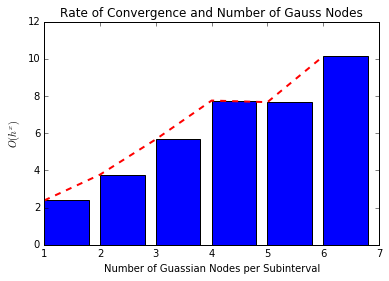

In [25]:
#converge rate anylisis and number of nodes per interval
plot(xs,mcrs,'r--', linewidth=2.0)
bar(xs,mcrs)
title('Rate of Convergence and Number of Gauss Nodes')
ylabel('$O(h^x)$')
xlabel('Number of Guassian Nodes per Subinterval')

From the data sampled it appears that an increase in Nodes leades to an increase in the rate of converges of the routine. From the sampled data it appears that when $x >= 4$ the convergence of the routine is at least big $O(h^8)$, where x is the number of nodes per subinterval.

## Adaptive Numerical Integration:

Next I implimented an adaptive numerical integration function. The goal here is to construct an approximation of the true integral while minimizing computational effort. The strategy here is to update the number of subdevisions in a iterative manner until the desired accuracy is achieved. In order to pick the optimal settings for the starting interval size n, its updating function $n_{i+1} = n_i * c$, and the k value (used as an approximation of the true integral for achieving the desired error) I wrote a script tofind the least computationaly expensive constants for n, c and k. The strategy used was to try a span of constants for each possible (n,k) pair and choose the lowest combination of the 3.

In [53]:
# %load "adaptive_int_tester.cpp"
/* Laruence Brown
   SMU Mathematics
   Math 3316
   21 November 2016 */

// Inclusions
#include <stdlib.h>
#include <stdio.h>
#include <iostream>
#include <math.h>
#include "fcn.hpp"

using namespace std;

// function prototypes
double composite_int(Fcn& f, const double a, 
			const double b, const int n);

/*
	-a and b are interval endpoints
	-Ntot = total number of intervals tried
	-R = Integral estimation
	-rtol and atol are used in modling equation

	model equation with...
	|Rn+k(f) − Rn(f)| < rtol |Rn+k(f)| + atol.

	trick is picking smart n and k values
*/

int integrate(Fcn& f, Fcn& g, double a, double b, int m, const int k, const double rtol,
							const double atol, double& R, int& n, int& Ntot){

	double tol = rtol * fabs(composite_int(f,a,b,m+k)) + atol;
	double err = fabs(composite_int(f,a,b,m+k) - composite_int(f,a,b,m));

	//break value
	if( m > 1000){
		Ntot = 1000000;
		return 0;
	}

	if( err > tol ){
		Ntot += m+k;
		m *= int(g(m));
		integrate(f, g, a, b, m, k, rtol, atol, R, n, Ntot);
	}

	//printf("\ntol:%f, \terr:%f\n", tol, err);
	R = composite_int(f,a,b,m);
	Ntot += m+k;
	n = m;
	return 1;




}

void adaptive_int_tester(Fcn& f, Fcn& g, int m, int k, const double a, const double b, const double rtol,
									const double atol, double& R, int& n, int& Ntot){
	//number of intervals
	Ntot = 0;
	integrate(f, g, a, b, m, k, rtol, atol, R, n, Ntot);
	
} // end of function



IndentationError: unexpected indent (<ipython-input-53-5c5830e87b42>, line 3)

In [54]:
# %load "test_adapt_tester.cpp"
/* 
   Laruence Brown
   SMU Mathematics
   Math 3316
   21 November 2016 
*/

/* 
        Finding corret m and k values, and interval size update function
*/


// Inclusions
#include <stdlib.h>
#include <stdio.h>
#include <iostream>
#include <vector>
#include <math.h>
#include "matrix.h"
#include "fcn.hpp"

using namespace std;

// function prototypes
int adaptive_int_tester(Fcn& f, Fcn& g, int m, int k, const double a, const double b, const double rtol,
              const double atol, double& R, int& n, int& Ntot);

// Integrand
class fcn : public Fcn {
public:
  double c, d;
  double operator()(double x) {   // function evaluation
    return (exp(c*x) + sin(d*x));
  }
  double antiderivative(double x) { // function evaluation
    return (exp(c*x)/c - cos(d*x)/d);
  }
};

// Interval Updating Function
class Fupd : public Fcn {
public:
  double c;
  double operator()(double n) {   // function evaluation
    return (pow(n,c));
  }
};



//sum vector
int sum_vector(vector<int> v){
  int sum =0;
  for (int i=0; i<v.size(); i++)
    sum += v[i];
  return sum;
}

//get lowest value from vector
int low_element(vector<int> v){
  int low_val = v[0];
  for (int i=1; i<v.size(); i++){
    if (low_val > v[i])
      low_val = v[i];
  }
  return low_val;
}

//get index of lowest value from vector
int low_element_index(vector<int> v){
  int low_index = 0;
  for (int i=1; i<v.size(); i++){
    if (v[low_index] > v[i])
      low_index = i;
  }
  return low_index;
}









// This routine tests the Gauss-4 method on a simple integral
int main(int argc, char* argv[]) {

  // limits of integration
  double a = -3.0;
  double b = 5.0;

  // integrand
  fcn f;
  f.c = 0.5;
  f.d = 25.0;

  //
  // true integral value
  //
  double Itrue = f.antiderivative(b) - f.antiderivative(a);

  //(m,k)
  vector<double> ms = {10,20,40,80,160,320};
  vector<double> ks = {10,20,40,80,160,320};

  Matrix Ntots_all(6,6);          //matrix to fill with summed total of operation for best coef
  Matrix Ntots_all_coefs(6,6);    //matrix to fill with coef that lead to that sum

  /*
        Trials for coef of (m,k) pair.
  */

  int m, k;
  for (int z=0; z<6; z++){
    for (int y=0; y<6; y++){

      m = ms[z];
      k = ks[y] + m;


      cout << "n:" << m << ", k:" << k << "\n";

      const int NUM_FS = 15;
      vector<double> coefs = Linspace(0.4, 1.0,NUM_FS);
      vector<int> ntots_all_mk_trial;


      for (int j=0; j<NUM_FS; j++){
            //g() interval number update function
        Fupd g;
        g.c = coefs[j];

            //ugly caluclating tolerence with - exp list
        const int NUM_TOL = 15;
        vector<double>rtol_exps = Linspace(1,14,NUM_TOL);

        //
        //    data vectors
        //
        vector<double> rtols;
        for (int i=0; i<NUM_TOL; i++){
          rtols.push_back(1/pow(10,rtol_exps[i]));
        }

        vector<double> errors;
        vector<int> ns;
        vector<int> Ntots;

        for (int i=0; i<NUM_TOL; i++){

          //excepted tolerance
          double rtol = rtols[i];
          double atol = rtol/(1000);
          double tolerance = rtol* fabs(Itrue) + atol;

          // iterate over n values, computing approximations, error, convergence rate
          double Iapprox; //integral estimation
          int Ntot; //number of intervals tried
          int n;    //final number of intervals used


          //
          //    call adaptive solver
          //
          adaptive_int_tester(f, g, m, k, a, b, rtol, atol, Iapprox, n, Ntot);



          //update data
          errors.push_back(fabs(Itrue-Iapprox)/fabs(Itrue));
          Ntots.push_back(Ntot);
          ns.push_back(n);


        }//end tol trial
          //update most resent all ntots for mk piar
          ntots_all_mk_trial.push_back(sum_vector(Ntots));

      }//end coef trial

      //add lowest ntots to (m,k) osition and lowest coef
      Ntots_all.M[z][y] = low_element(ntots_all_mk_trial);
      Ntots_all_coefs.M[z][y] = coefs[low_element_index(ntots_all_mk_trial)];

      printf(" Lowest total number of operations %f,  corresponding coef: %f\n", Ntots_all.M[z][y], Ntots_all_coefs.M[z][y]);

    }//end k
  } //end m

  //write findings to files
  Ntots_all.write("Total_operations.txt");
  Ntots_all_coefs.write("Optimal_coef.txt");

  //write ns, and ksvalues to file
  write(ms, "ns.txt");
  write(ks, "ks.txt");

  //find smallest value in matrix with associated n and k value
  double min_val = Ntots_all.M[0][0];
  int min_index[] = {0,0};
  for (int i=0; i<6; i++){
    for(int j=0; j<6; j++){
       if (min_val > Ntots_all.M[i][j]){
          min_val = Ntots_all.M[i][j];
          min_index[0] = i;
          min_index[1] = j;
        }
       }
  }

  int optimal_n = ms[min_index[0]];
  int optimal_k = ks[min_index[1]] + optimal_n;
  double optimal_coef = Ntots_all_coefs.M[min_index[0]][min_index[1]];

  printf("\n\nOptimal settings:\n\tn:%d, k:%d, coef: %f\n", optimal_n, optimal_k, optimal_coef);
}


IndentationError: unexpected indent (<ipython-input-54-f5f733ed4bd8>, line 3)

### Program Output

n:10, k:20
 Lowest total number of operations 2850.000000,  corresponding coef: 0.914286
n:10, k:30
 Lowest total number of operations 3240.000000,  corresponding coef: 0.914286
n:10, k:50
 Lowest total number of operations 4020.000000,  corresponding coef: 0.914286
n:10, k:90
 Lowest total number of operations 5580.000000,  corresponding coef: 0.914286
n:10, k:170
 Lowest total number of operations 8700.000000,  corresponding coef: 0.914286
n:10, k:330
 Lowest total number of operations 14940.000000,  corresponding coef: 0.914286
n:20, k:30
 Lowest total number of operations 2510.000000,  corresponding coef: 0.485714
n:20, k:40
 Lowest total number of operations 2820.000000,  corresponding coef: 0.485714
n:20, k:60
 Lowest total number of operations 3440.000000,  corresponding coef: 0.485714
n:20, k:100
 Lowest total number of operations 4680.000000,  corresponding coef: 0.485714
n:20, k:180
 Lowest total number of operations 7160.000000,  corresponding coef: 0.485714
n:20, k:340
 Lowest total number of operations 12120.000000,  corresponding coef: 0.485714
n:40, k:50
 Lowest total number of operations 3030.000000,  corresponding coef: 0.400000
n:40, k:60
 Lowest total number of operations 3260.000000,  corresponding coef: 0.400000
n:40, k:80
 Lowest total number of operations 3720.000000,  corresponding coef: 0.400000
n:40, k:120
 Lowest total number of operations 4640.000000,  corresponding coef: 0.400000
n:40, k:200
 Lowest total number of operations 6480.000000,  corresponding coef: 0.400000
n:40, k:360
 Lowest total number of operations 10160.000000,  corresponding coef: 0.400000
n:80, k:90
 Lowest total number of operations 2550.000000,  corresponding coef: 0.400000
n:80, k:100
 Lowest total number of operations 2700.000000,  corresponding coef: 0.400000
n:80, k:120
 Lowest total number of operations 3000.000000,  corresponding coef: 0.400000
n:80, k:160
 Lowest total number of operations 3600.000000,  corresponding coef: 0.400000
n:80, k:240
 Lowest total number of operations 4800.000000,  corresponding coef: 0.400000
n:80, k:400
 Lowest total number of operations 7200.000000,  corresponding coef: 0.400000
n:160, k:170
 Lowest total number of operations 4950.000000,  corresponding coef: 0.400000
n:160, k:180
 Lowest total number of operations 5100.000000,  corresponding coef: 0.400000
n:160, k:200
 Lowest total number of operations 5400.000000,  corresponding coef: 0.400000
n:160, k:240
 Lowest total number of operations 6000.000000,  corresponding coef: 0.400000
n:160, k:320
 Lowest total number of operations 7200.000000,  corresponding coef: 0.400000
n:160, k:480
 Lowest total number of operations 9600.000000,  corresponding coef: 0.400000
n:320, k:330
 Lowest total number of operations 9750.000000,  corresponding coef: 0.400000
n:320, k:340
 Lowest total number of operations 9900.000000,  corresponding coef: 0.400000
n:320, k:360
 Lowest total number of operations 10200.000000,  corresponding coef: 0.400000
n:320, k:400
 Lowest total number of operations 10800.000000,  corresponding coef: 0.400000
n:320, k:480
 Lowest total number of operations 12000.000000,  corresponding coef: 0.400000
n:320, k:640
 Lowest total number of operations 14400.000000,  corresponding coef: 0.400000


Optimal settings:
	n:20, k:30, coef: 0.485714

In [55]:
#importing operations data for choosing n,k values
Tot_op = loadtxt('Total_operations.txt')
ns = loadtxt('ns.txt')
ks = loadtxt('ks.txt')

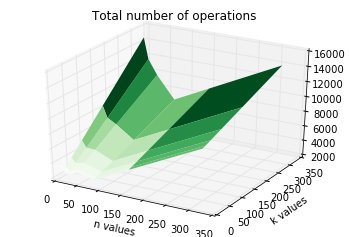

In [56]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
fig = figure()
ax = fig.add_subplot(111, projection='3d')
X, Y = meshgrid(ns, ks)
title('Total number of operations')
xlabel('n values')
ylabel('k values')
surf = ax.plot_surface(X, Y, Tot_op, rstride=1, cstride=1, linewidth=0, cmap=cm.Greens)

The Program found the optimal value of n to be 20, k to be 30 and the updating function for each succsessive number of intervals to be $n_{i+1} = n_i * c$.


Create a C++ main() routine in the file test adapt.cpp that uses your
adaptive int() function to integrate the same problem as before, but now using the pairs of
tolerances (rtol, atol) with atoli = rtoli/1000, and rtol =

10−2
, 10−4
, 10−6
, 10−8
, 10−10
, 10−12	
.
For each set of tolerances, print the actual values of |I(f) − R(f)| and rtol |I(f)| + atol, as well
as the n and Ntot required by your method. Does your method achieve the desired relative
error? How hard did it have to work to do so? Explain your findings.